# Data Reading

In [30]:
import pandas as pd

# URL of the Auto MPG dataset (CSV format) hosted on GitHub Gist
url = 'https://gist.githubusercontent.com/wmeints/80c1ba22ceeb7a29a0e5e979f0b0afba/raw/8629fe51f0e7642fc5e05567130807b02a93af5e/auto-mpg.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

In [31]:
# Display the first 5 rows of the DataFrame to get an initial look at the dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [32]:
# Display the last 5 rows of the DataFrame to see how the dataset ends
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [33]:
# Check the number of rows and columns in the dataset (rows, columns)
df.shape

(398, 9)

In [34]:
# Generate descriptive statistics for numerical columns (count, mean, std, min, max, etc.)
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [35]:
# Display summary information about the DataFrame including column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Data Cleaning

In [36]:
# Check for missing values by showing the count of nulls in each column
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [37]:
# Count the number of duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

In [38]:
# Remove rows where 'horsepower' cannot be converted to numeric (e.g., '?')
df = df[pd.to_numeric(df['horsepower'], errors='coerce').notna()]

# Convert the 'horsepower' column from object to integer type
df['horsepower'] = df['horsepower'].astype(int)

# Display updated DataFrame info to verify changes
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


/tmp/ipython-input-38-3594298160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype(int)


In [39]:
# Convert all columns with object data type to categorical data type
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    int64   
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    int64   
 7   origin        392 non-null    int64   
 8   car name      392 non-null    category
dtypes: category(1), float64(3), int64(5)
memory usage: 38.8 KB


# Data Exploration

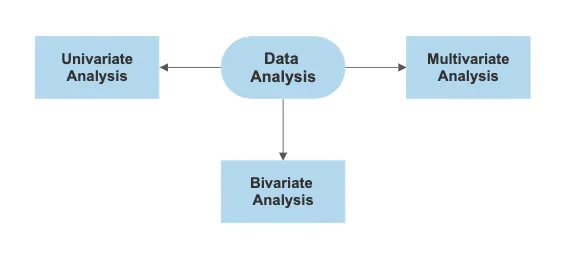

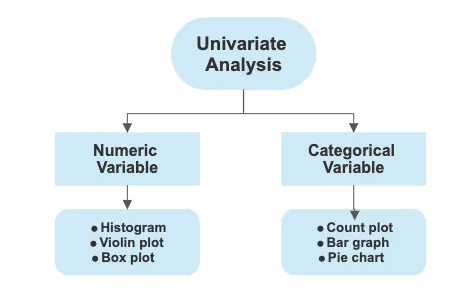

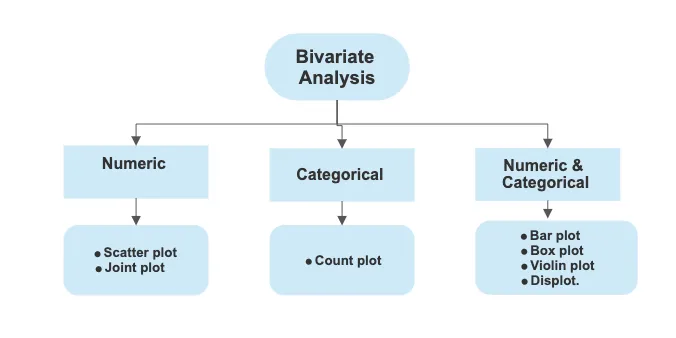

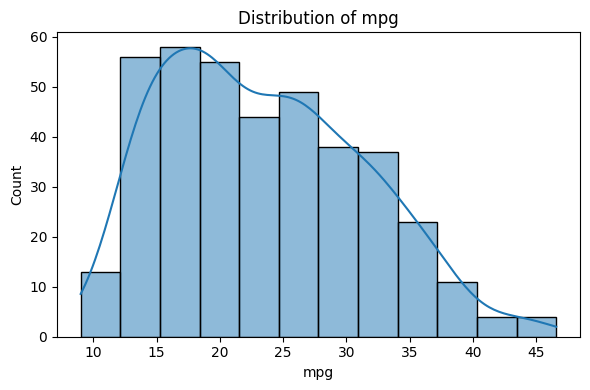

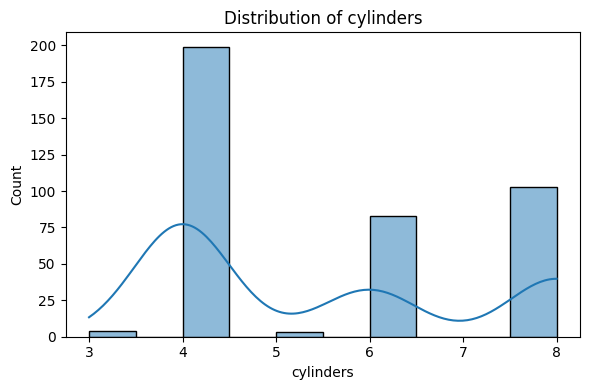

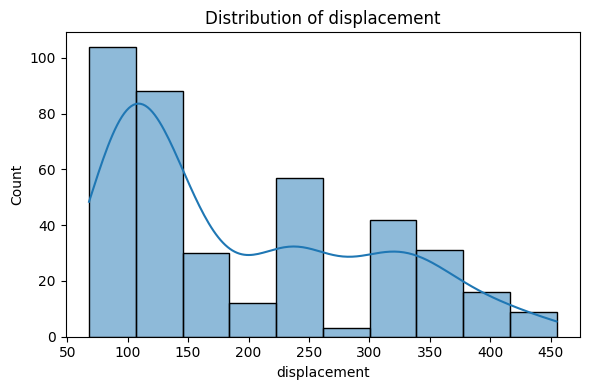

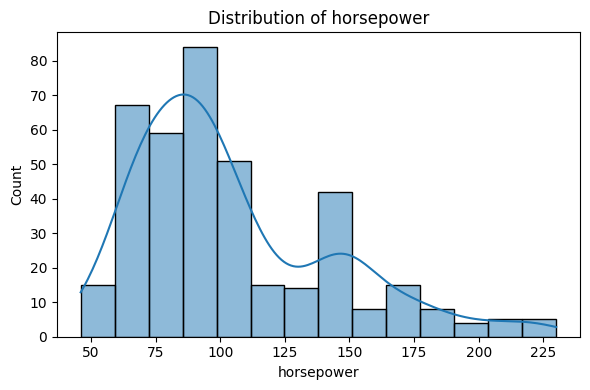

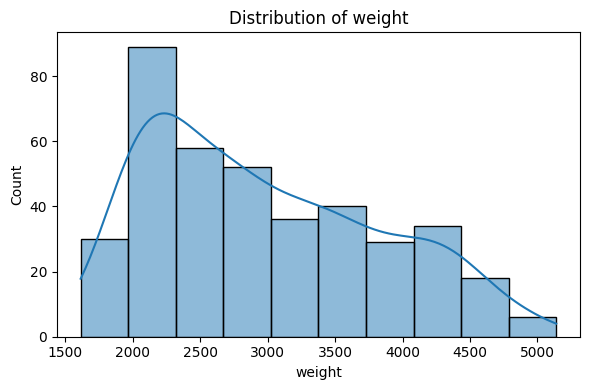

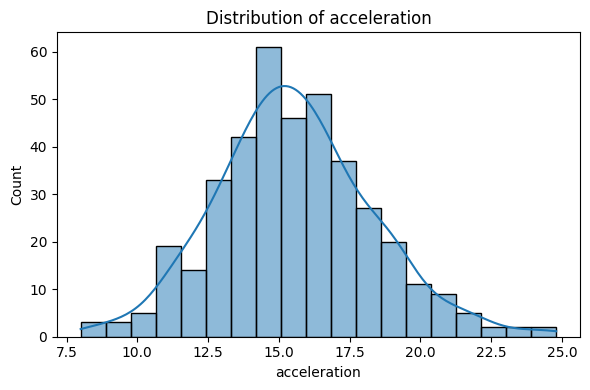

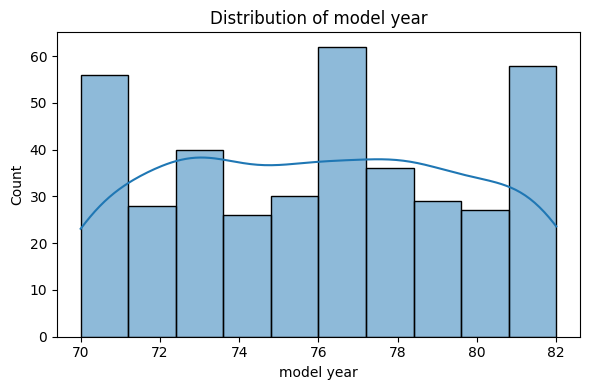

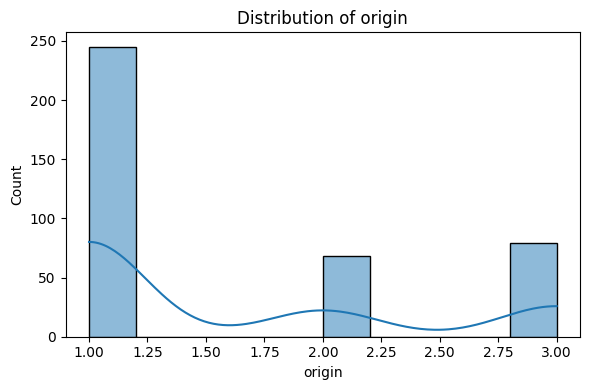

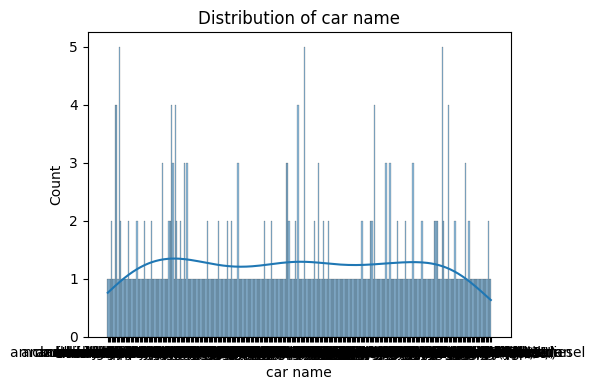

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#--- Univariate Analysis ---
def univariate_analysis(data):
    for col in data.columns:
        plt.figure(figsize=(6, 4))
        if data[col].dtype == 'object':
            sns.countplot(x=col, data=data)
            plt.title(f'Count Plot of {col}')
        else:
            sns.histplot(data[col], kde=True)
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

# Run the analysis
univariate_analysis(df)


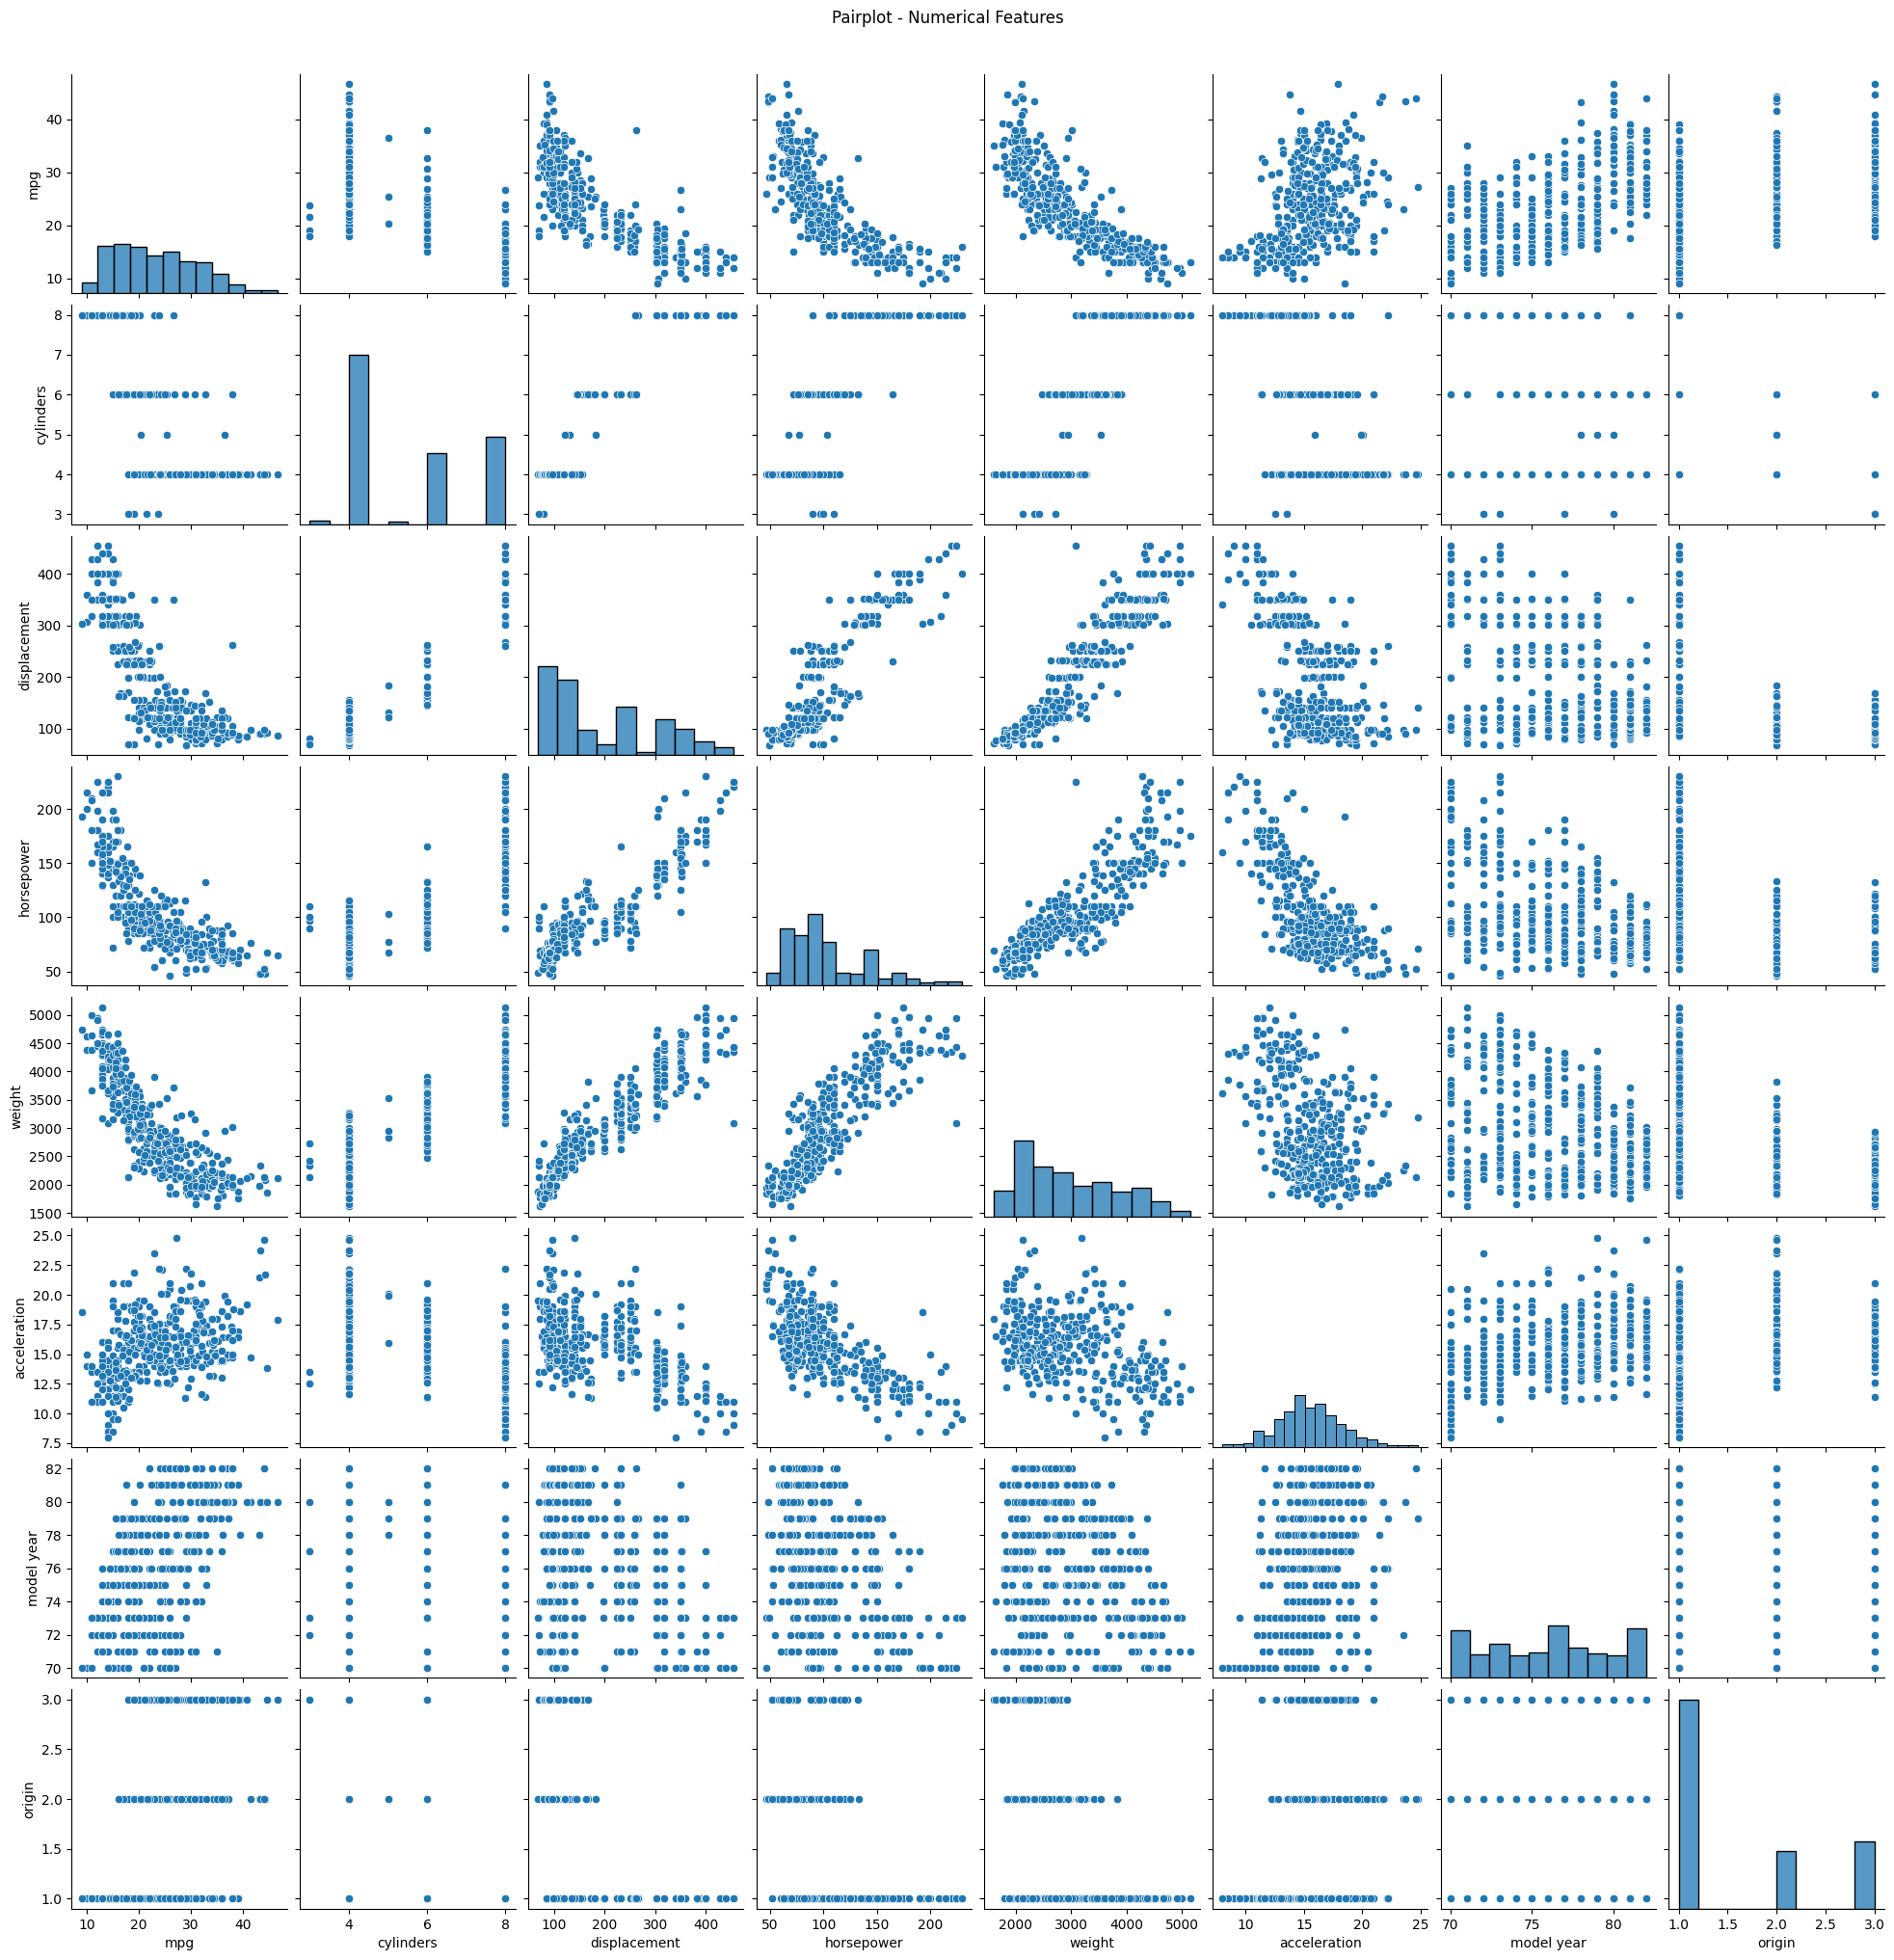

In [ ]:
# --- Bivariate Analysis ---
def bivariate_analysis(data):
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = data.select_dtypes(include='object').columns

    # Numerical vs Numerical
    sns.pairplot(data[num_cols])
    plt.suptitle("Pairplot - Numerical Features", y=1.02)
    plt.show()

    # Categorical vs Numerical
    for cat in cat_cols:
        for num in num_cols:
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=cat, y=num, data=data)
            plt.title(f'{num} by {cat}')
            plt.tight_layout()
            plt.show()

bivariate_analysis(df)

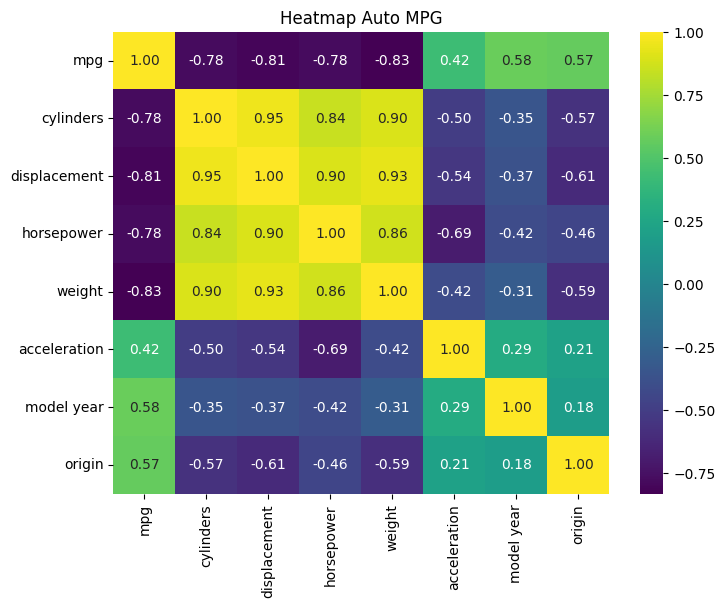

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title("Heatmap Auto MPG")
plt.show()

# Retain Only Highly Co-Related Column

In [41]:
import pandas as pd

# Sample DataFrame
# df = pd.read_csv('your_file.csv')  # use this if reading from a CSV
target_col = 'mpg'  # change this to your actual target column

# Compute correlation matrix
cor_matrix = df.corr(numeric_only=True)

# Get correlation of all features with the target column
target_corr = cor_matrix[target_col].abs()

# Keep only columns with correlation >= 0.6 (including target column itself)
high_corr_cols = target_corr[target_corr >= 0.82].index

# Filter the DataFrame
filtered_df = df[high_corr_cols]

filtered_df

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449
...,...,...
393,27.0,2790
394,44.0,2130
395,32.0,2295
396,28.0,2625


# Outlier Treatment

In [42]:
# Calculate IQR
Q1 = filtered_df.quantile(0.25)
Q3 = filtered_df.quantile(0.75)
IQR = Q3 - Q1

# Identify and print outliers for each column
for col in filtered_df.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = filtered_df[(filtered_df[col] < lower_bound) | (filtered_df[col] > upper_bound)]

    print(f"\nOutliers in column '{col}':")
    print(outliers[[col]])


Outliers in column 'mpg':
Empty DataFrame
Columns: [mpg]
Index: []

Outliers in column 'weight':
Empty DataFrame
Columns: [weight]
Index: []


# Simple Linear Regression

In [43]:
from sklearn.model_selection import train_test_split

X = filtered_df.drop('mpg', axis=1)
y = filtered_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error (average of absolute errors)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (penalizes larger errors more)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (same units as target)
rmse = np.sqrt(mse)

# R-squared (explained variance)
r2 = r2_score(y_test, y_pred)

# Print all metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 3.07
MSE: 16.31
RMSE: 4.04
R² Score: 0.73


| Metric       | Value | Interpretation                                     |
| ------------ | ----- | -------------------------------------------------- |
| **MAE**      | 3.21  | On average, predictions are off by \~3.2 mpg       |
| **MSE**      | 17.07 | Penalizes large errors; not directly interpretable |
| **RMSE**     | 4.13  | Typical prediction error is \~4.1 mpg              |
| **R² Score** | 0.72  | Model explains 72% of the variance in `mpg`        |


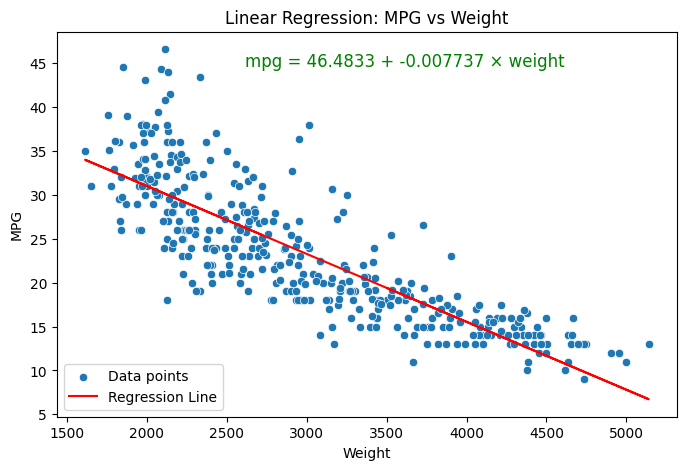

In [47]:
slope = model.coef_[0]
intercept = model.intercept_

# Plot scatter and regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x='weight', y='mpg', data=df, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')

# Annotate the regression equation on the plot
equation = f"mpg = {intercept:.4f} + {slope:.6f} × weight"
# Calculate position to place the equation dynamically
x_pos = df['weight'].min() + 1000    # add offset to avoid left edge
y_pos = df['mpg'].max() - 2          # subtract offset to avoid top edge
# Annotate the regression equation
plt.text(x=x_pos, y=y_pos, s=equation, color='green', fontsize=12)
plt.title("Linear Regression: MPG vs Weight")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.legend()
plt.show()

# Manual Test

In [23]:
# Model is already trained with df[['weight']] as X and df['mpg'] as y

# Create a new input manually (e.g., weight = 3000)
weight = int(input("Enter weight of the car: "))
new_data = [[weight]]

# Predict mpg for the new input
predicted_mpg = model.predict(new_data)

# Print the result
print(f"Predicted MPG for weight 3000 is: {predicted_mpg[0]:.2f}")


Enter weight of the car: 3000
Predicted MPG for weight 3000 is: 23.14


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Deployment

In [27]:
import gradio as gr
import numpy as np
from sklearn.linear_model import LinearRegression

# Train a simple model (or use your existing one)
X = df[['weight']]
y = df['mpg']
model = LinearRegression()
model.fit(X, y)

# Define prediction function
def predict_mpg(weight):
    pred = model.predict([[weight]])
    return f"Predicted MPG: {pred[0]:.2f}"

# Build Gradio interface
demo = gr.Interface(fn=predict_mpg,
                    inputs=gr.Number(label="Vehicle Weight"),
                    outputs="text",
                    title="MPG Predictor",
                    description="Enter the weight of a car to predict its MPG")

# Launch app with shareable link
demo.launch(share=True,inline=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://99351d94878c6e2e70.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
